# Problem Statement and Objective

A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. Although diabetes is not yet included in the penalty measures, the program is regularly adding new disease conditions to the list, now totaling 6 for FY2018. In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind, we used a medical claims dataset (description below), to answer these questions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Train Set

In [2]:
train = pd.read_csv('TRAIN.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71236 non-null  object
 1   gender                    71236 non-null  object
 2   age                       71236 non-null  object
 3   weight                    71236 non-null  object
 4   admission_type_id         71236 non-null  int64 
 5   discharge_disposition_id  71236 non-null  int64 
 6   admission_source_id       71236 non-null  int64 
 7   time_in_hospital          71236 non-null  int64 
 8   payer_code                71236 non-null  object
 9   medical_specialty         71236 non-null  object
 10  num_lab_procedures        71236 non-null  int64 
 11  num_procedures            71236 non-null  int64 
 12  num_medications           71236 non-null  int64 
 13  number_outpatient         71236 non-null  int64 
 14  number_emergency      

In [6]:
train.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [7]:
train.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted_NO'],
      dtype='object')

In [8]:
for col in train.columns:
    print(f'{col}: ')
    print(f'Unique values in columns {col} : {train[col].nunique()}')
    print(train[col].value_counts())
    print('_' * 50)

race: 
Unique values in columns race : 6
Caucasian          51799
AfricanAmerican    15472
?                   1368
Hispanic            1348
Other                892
Asian                357
Name: race, dtype: int64
__________________________________________________
gender: 
Unique values in columns gender : 3
Female             38522
Male               32713
Unknown/Invalid        1
Name: gender, dtype: int64
__________________________________________________
age: 
Unique values in columns age : 10
[70-80)     18454
[60-70)     15592
[50-60)     12382
[80-90)     11274
[40-50)      7048
[30-40)      2799
[90-100)     1769
[20-30)      1191
[10-20)       575
[0-10)        152
Name: age, dtype: int64
__________________________________________________
weight: 
Unique values in columns weight : 10
?            68888
[75-100)       988
[50-75)        689
[100-125)      429
[125-150)       94
[25-50)         74
[0-25)          43
[150-175)       23
[175-200)        7
>200             1
Name

In [9]:
train.drop(['weight','max_glu_serum'], axis = 1, inplace =True)

In [10]:
train.drop(columns = ['payer_code','medical_specialty'], axis = 1, inplace = True)

In [11]:
train.drop(['diag_1','A1Cresult'], axis = 1, inplace = True)

In [12]:
train.drop(columns = ['diag_2','diag_3'], axis = 1, inplace = True)

In [13]:
train.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_NO
count,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,2.152297,3.997235,5.881745,4.491479,43.129934,1.344601,15.719987,0.300747,0.157982,0.614605,7.147285,0.524973
std,1.546621,5.686334,4.426288,3.038481,19.006543,1.681742,8.174863,1.112868,0.697619,1.228058,1.991019,0.499379
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,2.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,8.000000,28.000000,22.000000,14.000000,129.000000,6.000000,81.000000,42.000000,42.000000,21.000000,9.000000,1.000000


In [14]:
train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1


In [15]:
train['readmitted_NO'].value_counts()

1    37397
0    33839
Name: readmitted_NO, dtype: int64

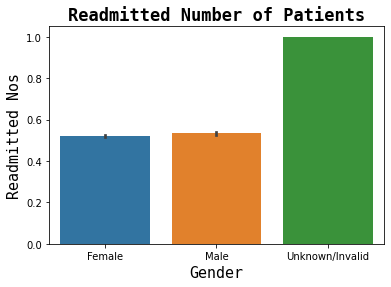

In [16]:
sns.barplot(x=train['gender'],y=train['readmitted_NO'])
plt.title('Readmitted Number of Patients', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Readmitted Nos', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

In [17]:
train['gender'].value_counts()

Female             38522
Male               32713
Unknown/Invalid        1
Name: gender, dtype: int64

#### Unknown/Invalid is not known it must be drop from (gender) & ? is not known must be grop from(weight)

In [18]:
train[train['gender'] == 'Unknown/Invalid']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
30506,Other,Unknown/Invalid,[70-80),3,1,1,1,5,5,22,0,0,0,4,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,1


In [19]:
train = train.drop(30506)

In [20]:
train = train.reset_index(drop = True)

## EDA

#### for the readmitted patients lab procedure and medications are same

In [21]:
train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted_NO'],
      dtype='object')

In [22]:
num_cols = ['num_lab_procedures','num_medications']

In [23]:
cat_cols = ['age','readmitted_NO']

<AxesSubplot:xlabel='num_lab_procedures', ylabel='num_medications'>

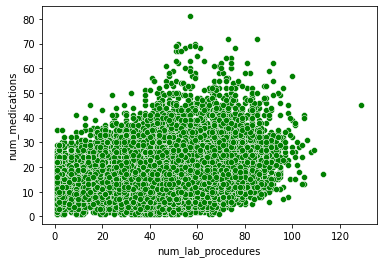

In [24]:
sns.scatterplot(x = 'num_lab_procedures', y = 'num_medications', data = train[train['readmitted_NO']==0], color = 'g')

<AxesSubplot:xlabel='num_lab_procedures', ylabel='num_medications'>

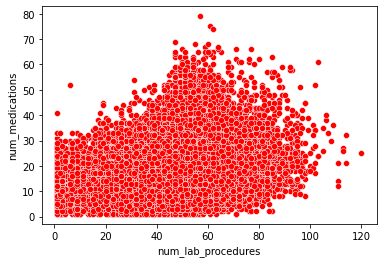

In [25]:
sns.scatterplot(x = 'num_lab_procedures', y = 'num_medications', data = train[train['readmitted_NO']==1], color = 'r')

<AxesSubplot:xlabel='age', ylabel='num_lab_procedures'>

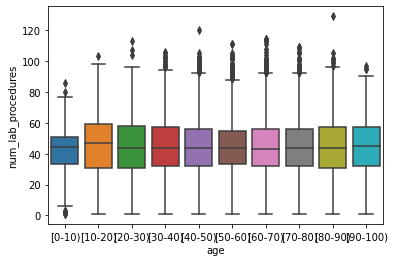

In [26]:
sns.boxplot(x = 'age', y = 'num_lab_procedures', data = train)

<AxesSubplot:xlabel='readmitted_NO', ylabel='num_lab_procedures'>

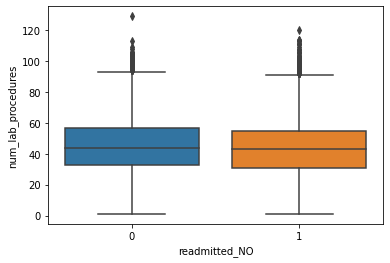

In [27]:
sns.boxplot(x = 'readmitted_NO', y = 'num_lab_procedures', data = train)

<AxesSubplot:xlabel='age', ylabel='num_medications'>

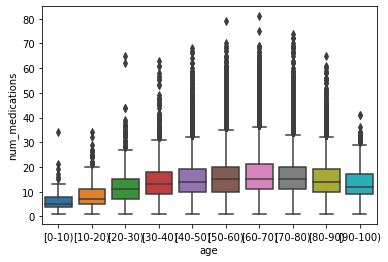

In [28]:
sns.boxplot(x = train['age'], y = train['num_medications'], data = train)

<AxesSubplot:xlabel='readmitted_NO', ylabel='num_medications'>

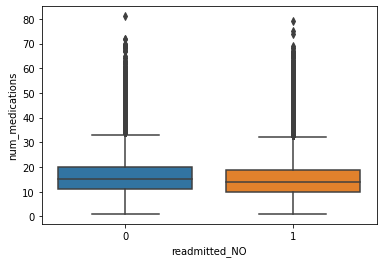

In [29]:
sns.boxplot(x = 'readmitted_NO', y = 'num_medications', data = train)

## Outlier Handling

In [30]:
def handle_outliers(df, var):
    var_data = df[var].values
    q25 = np.percentile(var_data, 25)
    q75 = np.percentile(var_data, 75)
    
    iqr = q75 - q25
    
    lower = q25 - (iqr * 1.5)
    upper = q75 + (iqr * 1.5)
    
    outliers = [x for x in var_data if x < lower or x > upper]
    print(f'Number of Outliers in {var} = {len(outliers)}')
    
    return list(df[(df[var] > upper) | (df[var] < lower)].index)

In [31]:
train_data = train.copy()

In [32]:
train.shape

(71235, 40)

In [33]:
train_data.shape

(71235, 40)

In [34]:
outliers = []
for num_col in num_cols:
    outliers.extend(handle_outliers(train_data, num_col))
    
    outliers = list(set(outliers))

Number of Outliers in num_lab_procedures = 220
Number of Outliers in num_medications = 1842


In [35]:
train_data = train_data.drop(outliers)

In [36]:
train_data.shape

(69210, 40)

<AxesSubplot:xlabel='age', ylabel='num_lab_procedures'>

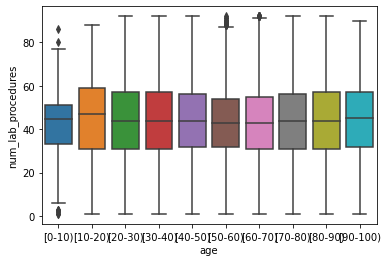

In [37]:
sns.boxplot(x = 'age', y = 'num_lab_procedures', data = train_data)

<AxesSubplot:xlabel='readmitted_NO', ylabel='num_lab_procedures'>

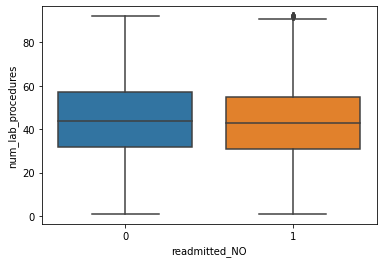

In [38]:
sns.boxplot(x = 'readmitted_NO', y = 'num_lab_procedures', data = train_data)

<AxesSubplot:xlabel='age', ylabel='num_medications'>

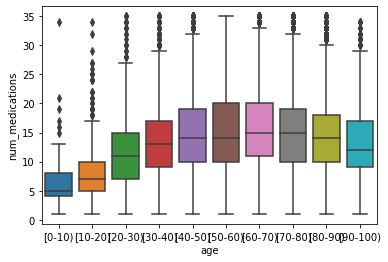

In [39]:
sns.boxplot(x = 'age', y = 'num_medications', data = train_data)

<AxesSubplot:xlabel='readmitted_NO', ylabel='num_medications'>

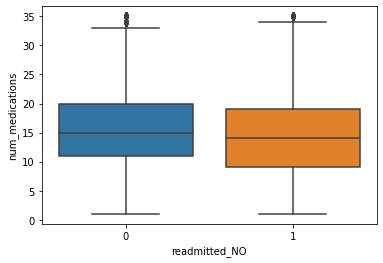

In [40]:
sns.boxplot(x = 'readmitted_NO', y = 'num_medications', data = train_data)

## Categorical Encoding

In [41]:
cat = ['race','gender','age','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
     'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
     'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
     'metformin-pioglitazone','change','diabetesMed']

In [42]:
for col in cat:
    train[col] = train[col].astype('category')
    train[col] = train[col].cat.codes

In [43]:
train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,3,0,0,6,25,1,1,41,0,1,0,0,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1
1,3,0,1,1,1,7,3,59,0,18,0,0,0,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,0
2,1,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1
3,3,1,3,1,1,7,2,44,1,16,0,0,0,7,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,0,1,1
4,3,1,4,1,1,7,1,51,0,8,0,0,0,5,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,1


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71235 entries, 0 to 71234
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   race                      71235 non-null  int8 
 1   gender                    71235 non-null  int8 
 2   age                       71235 non-null  int8 
 3   admission_type_id         71235 non-null  int64
 4   discharge_disposition_id  71235 non-null  int64
 5   admission_source_id       71235 non-null  int64
 6   time_in_hospital          71235 non-null  int64
 7   num_lab_procedures        71235 non-null  int64
 8   num_procedures            71235 non-null  int64
 9   num_medications           71235 non-null  int64
 10  number_outpatient         71235 non-null  int64
 11  number_emergency          71235 non-null  int64
 12  number_inpatient          71235 non-null  int64
 13  number_diagnoses          71235 non-null  int64
 14  metformin                 71235 non-nu

In [45]:
from sklearn.decomposition import PCA

pca=PCA()

In [46]:
pca.fit(train)

PCA()

In [47]:
transformed=pca.transform(train)

## Select KBest for fetaure selection

In [48]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif

In [49]:
test = SelectKBest(score_func=f_classif, k=20)

fit = test.fit(train.drop(columns=['readmitted_NO']), train['readmitted_NO'])

print(sorted(zip(fit.scores_,train.columns),reverse=True))

[(3122.3555293100694, 'number_inpatient'), (1380.192164015609, 'number_diagnoses'), (746.3301819992145, 'number_emergency'), (480.91597506515865, 'number_outpatient'), (161.58926366067092, 'time_in_hospital'), (127.05055510612416, 'num_procedures'), (108.45283738777177, 'num_medications'), (82.2503735327472, 'admission_source_id'), (80.72322475957334, 'num_lab_procedures'), (61.477452712305194, 'age'), (54.26326867195373, 'discharge_disposition_id'), (49.313069328342145, 'race'), (39.10835994869735, 'metformin'), (28.989085745410513, 'repaglinide'), (27.908634954389452, 'pioglitazone'), (14.947247727107667, 'gender'), (9.974387647705443, 'glipizide'), (8.14550916264434, 'acarbose'), (7.875839675789318, 'glyburide'), (5.139764855901808, 'nateglinide'), (4.936791995564792, 'rosiglitazone'), (4.207720606888322, 'admission_type_id'), (2.389468091044284, 'tolazamide'), (1.3071541419480266, 'miglitol'), (nan, 'examide'), (nan, 'citoglipton'), (5.631198642730468, 'glyburide-metformin'), (3.39

c:\users\gaurav deshmukh\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [29 30 34 35 36] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\users\gaurav deshmukh\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


#### Dropping the irrelevant features

In [50]:
to_drop=['metformin-pioglitazone','metformin-rosiglitazone','glimepiride-pioglitazone',
       'chlorpropamide','troglitazone','insulin','acetohexamide','glipizide-metformin',
       'tolbutamide','glimepiride','glyburide-metformin','citoglipton','examide','miglitol',
       'tolazamide','admission_type_id','rosiglitazone','nateglinide',
       'glyburide','acarbose','glipizide']

In [51]:
data=train.drop(columns=to_drop)

## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
data_sc=StandardScaler().fit_transform(data)

In [54]:
data_sc=pd.DataFrame(data_sc,columns=data.columns)

In [55]:
x_sc=data_sc.drop(columns=['readmitted_NO'])

In [56]:
x = data.drop(columns=['readmitted_NO'])

## Modelling

#### By using Kmeans

In [57]:
from sklearn.cluster import KMeans

In [58]:
c_data = data.iloc[:,:3]

c_data

,race,gender,age
0,3,0,0
1,3,0,1
2,1,0,2
3,3,1,3
4,3,1,4
...,...,...,...
71230,3,0,3
71231,3,0,7
71232,3,0,4
71233,3,1,7


In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(c_data, test_size = 0.2)

In [60]:
# Within Cluster Sum of Square - WCSS
# WCSS is the sum of squared distance between each point and centroid in a cluster

wcss = []

for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [61]:
wcss

[213080.36425215824,
 113830.3410652767,
 88194.22960141933,
 60482.676395290626,
 49339.30188003578,
 42526.57598698777,
 34622.737178801064,
 32913.7013799323,
 29428.284448116843,
 25618.77005628779,
 22697.39897250166,
 19689.9556958192,
 18159.07439112133,
 16669.844989676298,
 14839.48967551347]

## Elbow Method

Text(0.5, 1.0, 'Elbow Method')

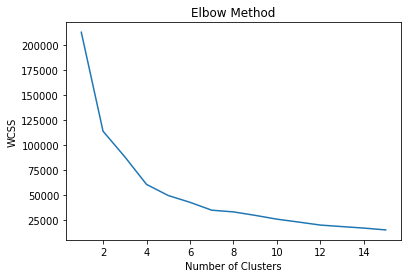

In [62]:
plt.plot(range(1,16), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

#### The optimum value of k should be 2

In [63]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')

In [64]:
kmeans.fit(x_train)

KMeans(n_clusters=2)

In [65]:
x_train.shape

(56988, 3)

In [66]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0])

In [67]:
len(kmeans.labels_)

56988

In [68]:
x_train['labels'] = kmeans.labels_

In [69]:
x_train

,race,gender,age,labels
7069,3,0,6,1
194,3,0,2,0
1267,3,1,6,1
14767,3,1,5,0
10280,3,0,8,1
...,...,...,...,...
53989,3,0,3,0
13503,3,0,8,1
59898,1,0,3,0
30807,1,1,5,0


In [70]:
kmeans.n_iter_

2

In [71]:
y = kmeans.predict(x_test)

In [72]:
y

array([0, 1, 0, ..., 0, 0, 0])

#### Lets measure the accuracy

In [73]:
import sklearn.metrics as metrics

In [74]:
kmeans.fit(x)
labels=kmeans.predict(x)

In [75]:
pd.crosstab(labels,train['readmitted_NO'])

readmitted_NO,0,1
row_0,,
0,20031,20970
1,13808,16426


In [76]:
metrics.accuracy_score(labels,train['readmitted_NO'])

0.5117849371797571

## 51.17% accuracy

## Test Set

In [77]:
test = pd.read_csv('TEST.csv')

In [78]:
test.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,index
0,Caucasian,Female,[80-90),?,2,3,7,6,MC,Emergency/Trauma,68,0,14,0,0,0,783,276,599,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[40-50),?,1,1,7,2,CP,?,55,0,13,0,0,0,250.13,276,V15,5,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,1
2,Caucasian,Male,[50-60),?,3,1,1,1,CP,?,38,1,12,0,0,1,414,427,272,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,2
3,Caucasian,Female,[50-60),?,1,1,7,3,HM,Family/GeneralPractice,49,0,13,0,0,0,599,276,41,7,None,None,No,No,No,No,No,No,Down,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,3
4,Caucasian,Male,[80-90),?,2,3,7,5,MC,Emergency/Trauma,64,2,25,0,0,0,530,530,280,9,None,>7,Steady,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,4


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30530 entries, 0 to 30529
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      30530 non-null  object
 1   gender                    30530 non-null  object
 2   age                       30530 non-null  object
 3   weight                    30530 non-null  object
 4   admission_type_id         30530 non-null  int64 
 5   discharge_disposition_id  30530 non-null  int64 
 6   admission_source_id       30530 non-null  int64 
 7   time_in_hospital          30530 non-null  int64 
 8   payer_code                30530 non-null  object
 9   medical_specialty         30530 non-null  object
 10  num_lab_procedures        30530 non-null  int64 
 11  num_procedures            30530 non-null  int64 
 12  num_medications           30530 non-null  int64 
 13  number_outpatient         30530 non-null  int64 
 14  number_emergency      

In [80]:
test.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'index'],
      dtype='object')

## Dropping the Columns

In [81]:
test.drop(['weight','max_glu_serum'], axis = 1, inplace =True)

In [82]:
test.drop(columns = ['payer_code','medical_specialty'], axis = 1, inplace = True)

In [83]:
test.drop(['diag_1','A1Cresult'], axis = 1, inplace = True)

In [84]:
test.drop(columns = ['diag_2','diag_3'], axis = 1, inplace = True)

In [85]:
cat=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
     'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
     'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
     'metformin-pioglitazone','change','diabetesMed','race','gender','age']
for col in cat:
    test[col]=test[col].astype('category')
    test[col]=test[col].cat.codes

In [86]:
test.drop(['metformin-pioglitazone','metformin-rosiglitazone','glimepiride-pioglitazone',
       'chlorpropamide','troglitazone','insulin','acetohexamide','glipizide-metformin',
       'tolbutamide','glimepiride','glyburide-metformin','citoglipton','examide','miglitol','tolazamide','admission_type_id','rosiglitazone','nateglinide',
       'glyburide','acarbose','glipizide'], axis = 1, inplace = True)

In [87]:
test=test.drop(columns=['index'])

#### Whiten to scale

In [88]:
from scipy.cluster.vq import whiten

In [89]:
test_w=whiten(test)
test_w=pd.DataFrame(test_w,columns=test.columns)
target=kmeans.predict(test_w)

## Submission

In [90]:
target = kmeans.predict(test)

In [91]:
sub = pd.DataFrame(target, columns=['target'])

In [92]:
sub=sub.reset_index()

In [93]:
sub.to_csv('submission_C.csv',index=False)

# Conclusion

In this project, we tried to build a model using unsupervised algorithm of K-means Clustering. to get the best possible prediction.